In [1]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.finnhub.data import FinnhubData as finnhub
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [3]:
ticker = 'APHA'

fh = finnhub()
data = fh.get_historical_data(ticker, fh.get_daily_closings, days = 180)

data.index = data['t']
data.sort_index()
data.drop_duplicates()

,t,o,l,h,c,v
t,,,,,,
2020-09-11 21:00:00,2020-09-11 21:00:00,4.51,4.5100,4.5500,4.5500,2729
2020-09-14 21:00:00,2020-09-14 21:00:00,4.62,4.6400,4.6200,4.6500,1845
2020-09-15 21:00:00,2020-09-15 21:00:00,4.64,4.6400,4.6400,4.6400,438
2020-09-16 21:00:00,2020-09-16 21:00:00,4.65,4.6502,4.6500,4.6502,1652
2020-09-17 21:00:00,2020-09-17 21:00:00,4.62,4.6594,4.6301,4.6600,2376
...,...,...,...,...,...,...
2021-03-04 22:00:00,2021-03-04 22:00:00,16.80,16.9600,16.8600,17.0400,85298
2021-03-05 22:00:00,2021-03-05 22:00:00,15.80,15.9300,15.8100,15.9700,40802
2021-03-08 22:00:00,2021-03-08 22:00:00,16.21,16.3400,16.2100,16.3400,12028


In [4]:
# refresh data for today
fh.get_daily_closings(ticker, datetime.today(), include_ah = True)

,t,o,l,h,c,v
0,2021-03-10 14:00:00,18.68,19.39,18.73,19.68,4490103
1,2021-03-10 22:00:00,17.83,17.83,17.94,17.97,32448
2,2021-03-11 00:00:00,17.86,17.86,17.86,17.94,5310


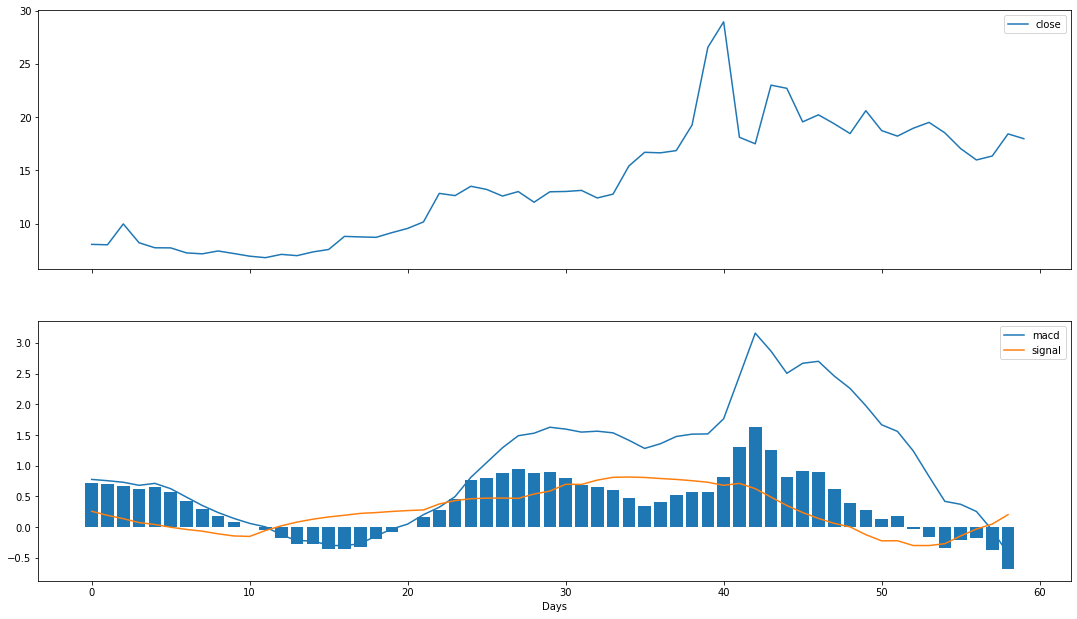

In [5]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

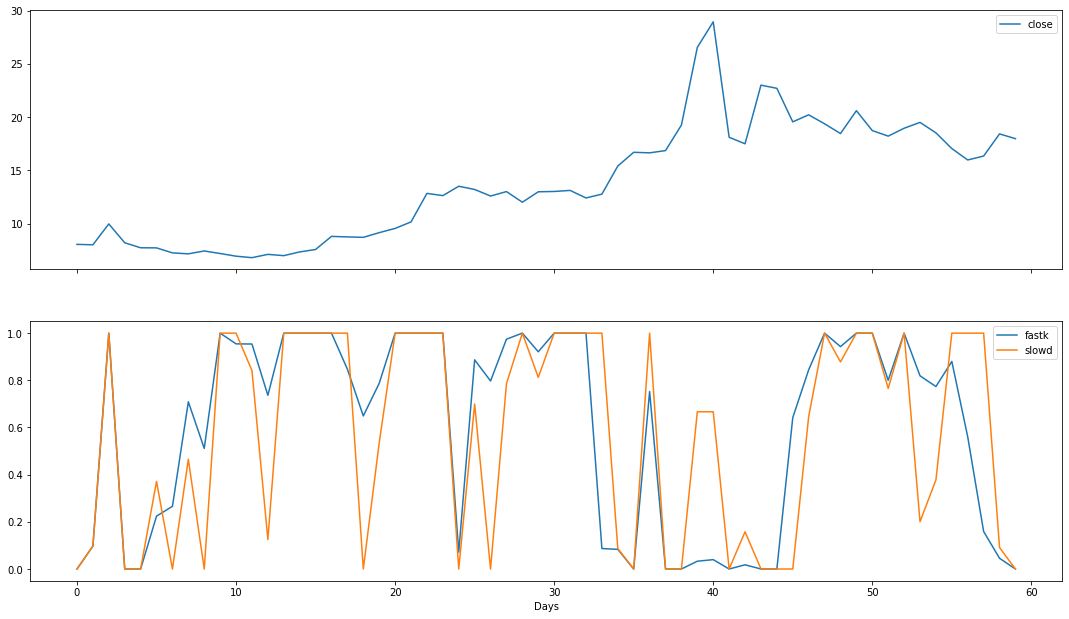

In [6]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)